In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)




In [3]:
sales=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#sales.drop(['Invoice ID'],axis=1)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df=sales.copy()

In [9]:
sales[[i for i in sales.columns if sales[i].dtypes == 'object']] # categorical features

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [10]:
sales[[i for i in sales.columns if sales[i].dtypes != 'object']] #Numerical features

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


<ipython-input-11-86652fd113d9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales.corr(),annot=True)


<Axes: >

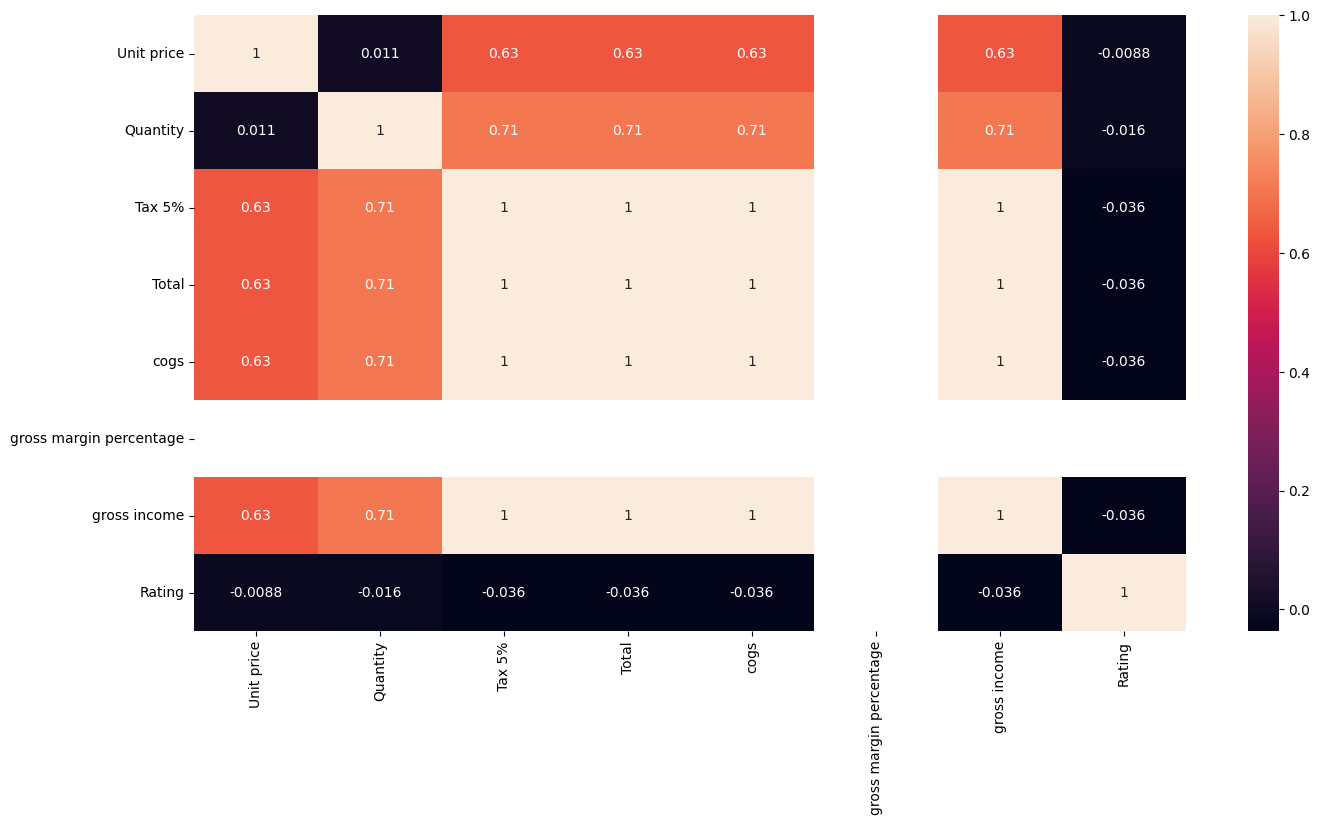

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(sales.corr(),annot=True)

First I concat the two features that is date and time into DateTime and then convert that string to datetime

In [12]:
sales['DateTime'] = sales['Date']+" "+ sales['Time']
sales['DateTime'] = pd.to_datetime(sales['DateTime'])

In [13]:

#categorical sales data
[i for i in sales.columns if sales[i].dtypes =='object']
sales =pd.get_dummies(sales)

In [14]:
#Feature Engineering

sales['TotalbyQuantity']=sales['Total']/sales['Quantity']

In [15]:
#standardizing numerical variables

numerical_features =sales[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_features = scaler.fit_transform(numerical_features)
numerical_features = pd.DataFrame(numerical_features,columns=['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'])
numerical_features

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.030707,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0.971295,1.000000,0.980465,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0.242101,0.000000,0.022049,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0.620160,0.000000,0.056622,0.056622,0.056622,0.0,0.056622,0.016667,0.620160


Here I am dropping some features and then using concat function to make new df

In [16]:
#sales

In [17]:
sales=sales.drop(['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'],axis=1)

In [18]:
sales = pd.concat([sales,numerical_features],axis=1)
sales.head()


,DateTime,Invoice ID_101-17-6199,Invoice ID_101-81-4070,Invoice ID_102-06-2002,Invoice ID_102-77-2261,Invoice ID_105-10-6182,Invoice ID_105-31-1824,Invoice ID_106-35-6779,Invoice ID_109-28-2512,Invoice ID_109-86-4363,...,Payment_Ewallet,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,2019-01-05 13:08:00,0,0,0,0,0,0,0,0,0,...,1,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,2019-03-08 10:29:00,0,0,0,0,0,0,0,0,0,...,0,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,2019-03-03 13:23:00,0,0,0,0,0,0,0,0,0,...,0,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,2019-01-27 20:33:00,0,0,0,0,0,0,0,0,0,...,1,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,2019-02-08 10:37:00,0,0,0,0,0,0,0,0,0,...,1,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131


**Splitting Data**

In [19]:
#sales=sales.drop(['Invoice ID'],axis=1)

In [20]:
sales = sales.drop(['DateTime'],axis=1)

In [21]:
X = sales.drop(['Total'],axis=1)
y = sales['Total']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [24]:
#cheching the splitted data
X_train.shape

(700, 1622)

In [25]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

700
300
700
300


**Modelling**

In [26]:
#scoring function
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
#fit the model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

**Model 1 Linear Regression**

In [27]:
model_1_lr =LinearRegression()
model_1_lr.fit(X_train,y_train)
model_1_pred = model_1_lr.predict(X_test)

In [28]:
mse =mean_absolute_error(y_test,model_1_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_1_pred))
mae = mean_absolute_error(y_test, model_1_pred)

In [29]:
score = model_1_lr.score(X_train, y_train)

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = model_1_lr.predict(X_test)

In [ ]:
#accuracy_score(y_test,y_pred)*100

In [ ]:
#confusion_matrix(y_test,y_pred)

In [75]:
print('Linear Regression')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print('Testing score:',score)
print("Training Score:\n",model_1_lr.score(X_train,y_train)*100)

Linear Regression
MSE: 0.18
RMSE: 0.22
MAE: 0.18
Training score:  1.0
Testing score: 1.0
Training Score:
 100.0


**Model 2 DecisionTreeRegressor**

In [35]:
model_2_dtr =DecisionTreeRegressor()
model_2_dtr.fit(X_train,y_train)
model_2_pred = model_2_dtr.predict(X_test)

In [36]:
mse = mean_absolute_error(y_test,model_2_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_2_pred))
mae = mean_absolute_error(y_test,model_2_pred)

In [76]:
print('Decision Tree Regressor')
print('MSE: %.2f'%mse)
print('RMSE: %2f' % rmse)
print('MAE: %2f' % mae)
print('Training score:' ,score)
print('Testing score:' ,score)
print("Training Score:\n",model_2_dtr.score(X_train,y_train)*100)


Decision Tree Regressor
MSE: 0.18
RMSE: 0.222261
MAE: 0.184991
Training score: 1.0
Testing score: 1.0
Training Score:
 100.0


**Model 3 RandomForestRegressor**

In [38]:
model_3_rfr= RandomForestRegressor()
model_3_rfr.fit(X_train,y_train)
model_3_pred = model_3_rfr.predict(X_test)

In [39]:
mse = mean_absolute_error(y_test,model_3_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_3_pred))
mae = mean_absolute_error(y_test,model_3_pred)

In [77]:
print('RandomForestRegressor')
print('MSE : %2f' % mse)
print('RMSE: %2f' % rmse)
print('MAE: %2f' % mae)
print('Training score: ',score)
print('Testing score:',score)
print("Training Score:\n",model_3_rfr.score(X_train,y_train)*100)

RandomForestRegressor
MSE : 0.184991
RMSE: 0.222261
MAE: 0.184991
Training score:  1.0
Testing score: 1.0
Training Score:
 99.99910323536237


 **Model 4 Ridge Regression**

*Ridge* Regression(Tikhonov regularization) is a regularized version of Linear Regression,The regularization term forces the learning algorithm to not only fit the data but also keep the model weights as small as possible

In [42]:
from sklearn.linear_model import Ridge

In [43]:
model_4_rdr= Ridge()
model_4_rdr.fit(X_train,y_train)
model_4_pred = model_4_rdr.predict(X_test)

In [44]:
mse = mean_absolute_error(y_test,model_4_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_4_pred))
mae = mean_absolute_error(y_test,model_4_pred)

In [78]:
print('RidgeRegression')
print('MSE : %2f' % mse)
print('RMSE: %2f' % rmse)
print('MAE: %2f' % mae)
print('Training score: ',score)
print('Testing score:',score)
print("Training Score:\n",model_4_rdr.score(X_train,y_train)*100)

RidgeRegression
MSE : 0.184991
RMSE: 0.222261
MAE: 0.184991
Training score:  1.0
Testing score: 1.0
Training Score:
 99.96748577347799


**Model 5 Lasso Regression**

Lasso Regression is similar to ridge regression except that it uses L1 regularization,It automatically performs feature selection

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [46]:
from sklearn.linear_model import Lasso

In [47]:
model_5_lsr= Lasso()
model_5_lsr.fit(X_train,y_train)
model_5_pred = model_5_lsr.predict(X_test)

In [48]:
mse = mean_absolute_error(y_test,model_5_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_5_pred))
mae = mean_absolute_error(y_test,model_5_pred)

In [79]:
print('LassoRegression')
print('MSE : %2f' % mse)
print('RMSE: %2f' % rmse)
print('MAE: %2f' % mae)
print('Training score: ',score)
print('Testing score:',score)
print("Training Score:\n",model_5_lsr.score(X_train,y_train)*100)

LassoRegression
MSE : 0.184991
RMSE: 0.222261
MAE: 0.184991
Training score:  1.0
Testing score: 1.0
Training Score:
 0.0


**Forcasting**

In [62]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
